In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from datetime import datetime

In [ ]:
# https://data.gov.lt/datasets/2700/ --- DĖMESIO! Daug duomenų! Pasiūlymas - pagrįstai išsirinkti dalį įrašų !
# Remdamiesi pateikiamais pacientų
# laboratorinių tyrimų rez., įvertinkite tirtųjų asmenų imtį:
# kiek vyrų, moterų, kokio amžiaus, kokių amžiaus grupių, bendra
# sveikatos būklė kiekvienoje grupėje., kuriame regione buvo
# sveikiausi/ligočiausi asmenys. Parašykite skriptą, kuris iš
# vartotojo pateiktų duomenų įvertintų, palygintų šio vartotojo sveikatos būklę su atitinkamos
# grupės žmonių sveikatos būkle.

In [2]:
Vilkaviskis = pd.read_csv('../../../eismas/VilkaviskioLigonine.csv')
print('Nuskaityta 1')
Elekrenai = pd.read_csv('../../../eismas/ElektrenuLigonine.csv')
print('Nuskaityta 2')
Kedainiai = pd.read_csv('../../../eismas/KedainiuLigonine.csv')
print('Nuskaityta 3')

Nuskaityta 1
Nuskaityta 2
Nuskaityta 3


In [3]:
Vilkaviskis['vieta'] = 'Vilkaviškis'
Elekrenai['vieta'] = 'Elektrėnai'
Kedainiai['vieta'] = 'Kėdainiai'

bendra = pd.concat([Vilkaviskis, Elekrenai], axis=0, ignore_index=True)
bendra = pd.concat([bendra, Kedainiai], axis=0, ignore_index=True)
bendra = bendra.dropna(subset=['tyrimo_data'])
bendra.head(2)


,_type,_id,_revision,_page.next,vda_prime_key,istaigos_pav,paciento_id,paciento_lytis,paciento_gimimo_metai,tyrimo_grupe,...,tyrimo_meginio_tipas,tyrimo_analite,analites_loinc_kodas,analites_rezultatas,analites_norma_nuo,analites_norma_iki,matavimo_vienetas,paciento_diagnozes_tlk_10_am_kodas,paciento_diagnoze,vieta
0,datasets/gov/lab_tyrimai/lab_tyrimai/Vilkavisk...,5a895f69-c3b2-49d3-82e4-e51c0ae85cc6,8a7e13cb-969c-43e7-9f13-957ea2cac651,NaN,00000686c24d12e,Vilkaviškio ligoninė,508f39246a00e95,V,1945-01-01,Hematologija,...,Kraujas,Hematokritas (HCT),4544-3,36.0,33.5,52.0,l/l,D62,Ūminė pohemoraginė anemija,Vilkaviškis
1,datasets/gov/lab_tyrimai/lab_tyrimai/Vilkavisk...,575d83ca-588e-4634-887e-24f1e462cbf8,bc20f177-781a-43ec-bd0b-3f8e3f6e7662,NaN,00000bad5e372ed,Vilkaviškio ligoninė,19c99cac5aed2e3,V,1955-01-01,Hematologija,...,Kraujas,Monocitai (MON%),5905-5,1.0,0.0,10.0,%,J44.1,"Lėtinė obstrukcinė plaučių liga su paūmėjimu, ...",Vilkaviškis


In [ ]:
bendra.columns

In [4]:
bendra['paciento_gimimo_metai'] = pd.to_datetime(bendra['paciento_gimimo_metai'])
bendra['tyrimo_data'] = pd.to_datetime(bendra['tyrimo_data'])

# Nustatome paciento amžių (tyrimo laiku)
bendra['amzius'] = bendra['tyrimo_data'].dt.year - bendra['paciento_gimimo_metai'].dt.year
bendra.head(2)

,_type,_id,_revision,_page.next,vda_prime_key,istaigos_pav,paciento_id,paciento_lytis,paciento_gimimo_metai,tyrimo_grupe,...,tyrimo_analite,analites_loinc_kodas,analites_rezultatas,analites_norma_nuo,analites_norma_iki,matavimo_vienetas,paciento_diagnozes_tlk_10_am_kodas,paciento_diagnoze,vieta,amzius
0,datasets/gov/lab_tyrimai/lab_tyrimai/Vilkavisk...,5a895f69-c3b2-49d3-82e4-e51c0ae85cc6,8a7e13cb-969c-43e7-9f13-957ea2cac651,NaN,00000686c24d12e,Vilkaviškio ligoninė,508f39246a00e95,V,1945-01-01,Hematologija,...,Hematokritas (HCT),4544-3,36.0,33.5,52.0,l/l,D62,Ūminė pohemoraginė anemija,Vilkaviškis,79
1,datasets/gov/lab_tyrimai/lab_tyrimai/Vilkavisk...,575d83ca-588e-4634-887e-24f1e462cbf8,bc20f177-781a-43ec-bd0b-3f8e3f6e7662,NaN,00000bad5e372ed,Vilkaviškio ligoninė,19c99cac5aed2e3,V,1955-01-01,Hematologija,...,Monocitai (MON%),5905-5,1.0,0.0,10.0,%,J44.1,"Lėtinė obstrukcinė plaučių liga su paūmėjimu, ...",Vilkaviškis,68


In [45]:
# plt.style.available

In [5]:
plt.style.use(style='default')
#print(plt.style.available)
#bmh, classic, default, fivethirtyeight, ggplot ...
plt.style.use(style='ggplot')

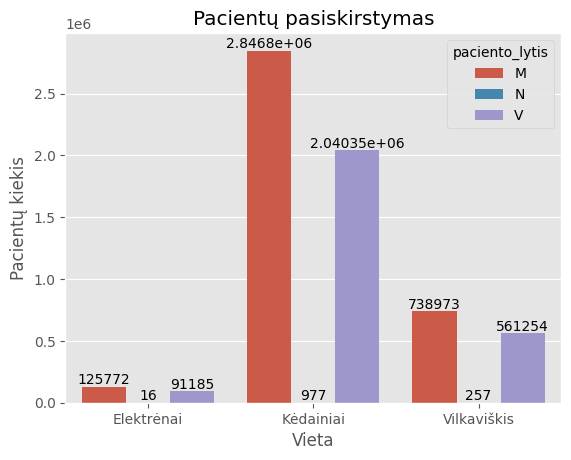

In [6]:
plotdf = bendra.groupby(['paciento_lytis', 'vieta'])['_id'].count().reset_index(name='kiekis')
fig, ax = plt.subplots()
sns.barplot(data=plotdf, x='vieta', y='kiekis', hue='paciento_lytis')
ax.set_xlabel('Vieta')
ax.set_ylabel('Pacientų kiekis')
ax.set_title('Pacientų pasiskirstymas')
for container in ax.containers:
    ax.bar_label(container)
# plt.legend()
plt.show()
# Pasirinktose liginėse moterys kreipiasi daugiau negu vyrų

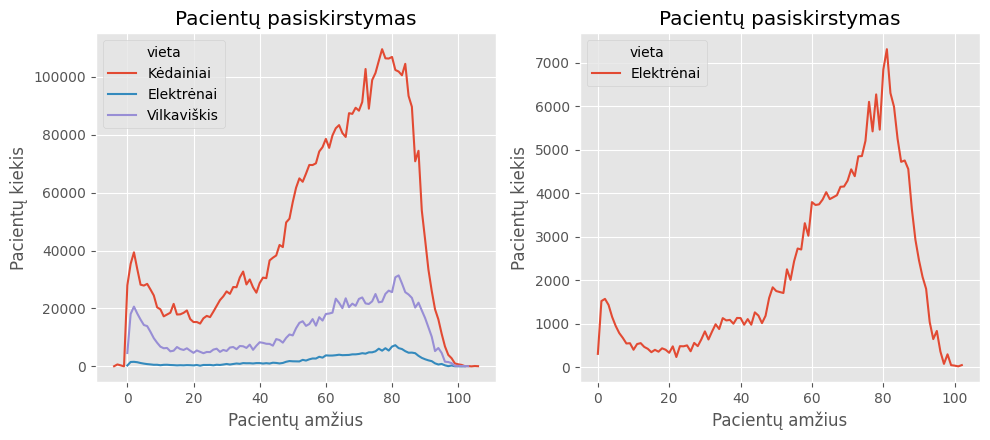

In [7]:
plotdf = bendra.groupby(['amzius', 'vieta'])['_id'].count().reset_index(name='kiekis')
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 4.5))
sns.lineplot(data=plotdf, x='amzius', y='kiekis', hue='vieta', ax=ax1)
sns.lineplot(data=plotdf[plotdf['vieta'] == 'Elektrėnai'], x='amzius', y='kiekis', hue='vieta', ax=ax2)
ax1.set_xlabel('Pacientų amžius')
ax1.set_ylabel('Pacientų kiekis')
ax1.set_title('Pacientų pasiskirstymas')
ax2.set_xlabel('Pacientų amžius')
ax2.set_ylabel('Pacientų kiekis')
ax2.set_title('Pacientų pasiskirstymas')
# for container in ax.containers:
#     ax.bar_label(container)
# plt.legend()
fig.tight_layout()
plt.show()
# Pirmas pikas yra naujagimiai, paskui iki paauglystės apsilankymų skaičius mažėja
# Nuo 40 metų apsilankymai pas medikus pradeda dažnėti. Tyrimai

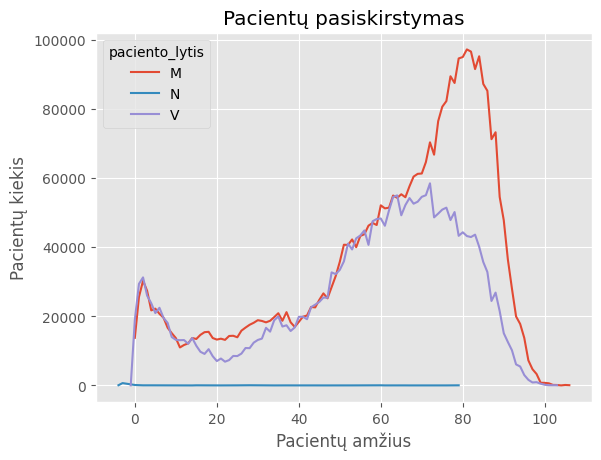

In [8]:
plotdf = bendra.groupby(['paciento_lytis', 'amzius'])['_id'].count().reset_index(name='kiekis')
fig, ax = plt.subplots()
sns.lineplot(data=plotdf, x='amzius', y='kiekis', hue='paciento_lytis')
ax.set_xlabel('Pacientų amžius')
ax.set_ylabel('Pacientų kiekis')
ax.set_title('Pacientų pasiskirstymas')
# for container in ax.containers:
#     ax.bar_label(container)
# plt.legend()
plt.show()
# Tendencijos panašios išskyrus laikotarpius nuo 18-38 metų po maždaug 75 metų
# 18-38 laikotarpyje tikėtina moterys apsilanko pas medikus dažniau negu vyrai   dėl galimo nėstumo (Spėjimas!)
#  nuo 75 metų  - moterų gyvenimo trukmė ilgesnio ir jos tiesiog kreipiasi į medikus dažniau nei vyrai

In [9]:
def set_amz_grupe(x):
    if x < 20:
        return '20 ir mažiau'
    elif 20 <= x < 30:
        return '20-29'
    elif 30 <= x < 40:
        return '30-39'
    elif 40 <= x < 50:
        return '40-39'
    elif 50 <= x < 60:
        return '50-59'
    elif 60 <= x < 70:
        return '60-79'
    elif 70 <= x < 80:
        return '70-79'
    else:
        return '80 ir daugiau'

bendra['amz_grupe'] = bendra['amzius'].apply(set_amz_grupe)

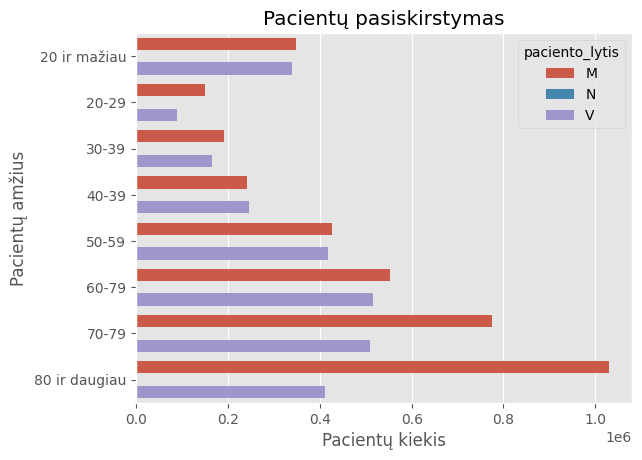

In [10]:
plotdf = bendra.groupby(['paciento_lytis', 'amz_grupe'])['_id'].count().reset_index(name='kiekis')
fig, ax = plt.subplots()
sns.barplot(data=plotdf, y='amz_grupe', x='kiekis', hue='paciento_lytis', orient='h')
ax.set_ylabel('Pacientų amžius')
ax.set_xlabel('Pacientų kiekis')
ax.set_title('Pacientų pasiskirstymas')

# for container in ax.containers:
#     ax.bar_label(container)
# plt.legend()
plt.show()

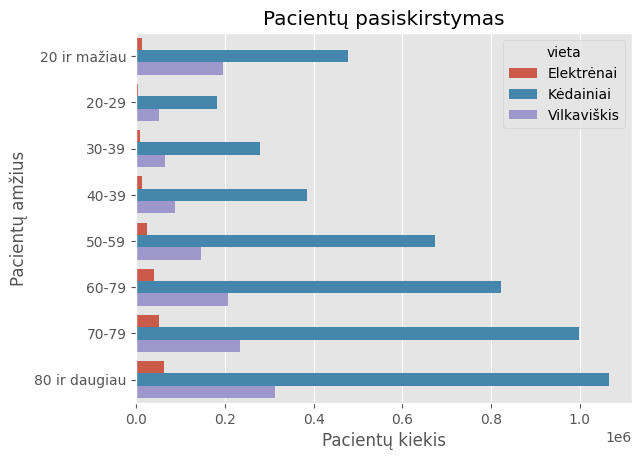

In [11]:
plotdf = bendra.groupby(['vieta', 'amz_grupe'])['_id'].count().reset_index(name='kiekis')
fig, ax = plt.subplots()
sns.barplot(data=plotdf, y='amz_grupe', x='kiekis', hue='vieta', orient='h')
ax.set_ylabel('Pacientų amžius')
ax.set_xlabel('Pacientų kiekis')
ax.set_title('Pacientų pasiskirstymas')

# for container in ax.containers:
#     ax.bar_label(container)
# plt.legend()
plt.show()

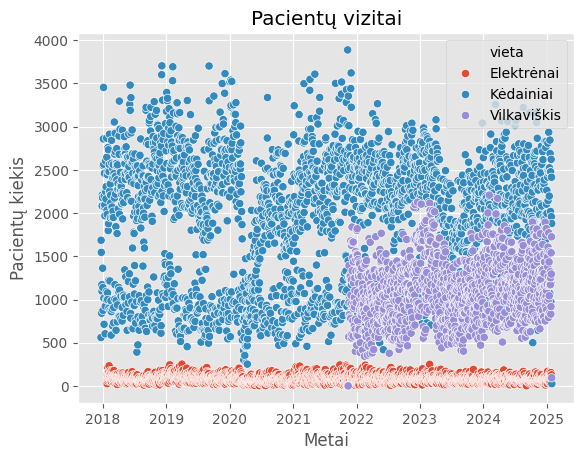

In [13]:
plotdf = bendra.groupby(['vieta', 'tyrimo_data'])['_id'].count().reset_index(name='kiekis')
fig, ax = plt.subplots()
sns.scatterplot(data=plotdf, y='kiekis', x='tyrimo_data', hue='vieta')
ax.set_ylabel('Pacientų kiekis')
ax.set_xlabel('Metai')
ax.set_title('Pacientų vizitai')

# for container in ax.containers:
#     ax.bar_label(container)
# plt.legend()
plt.show()

In [14]:
# Apsibrėžiam laikotarpį
start_date = '2022-01-01'
end_date = '2024-12-31'

ivykiai_v_3m = bendra[(bendra['tyrimo_data'] >= start_date) & (bendra['tyrimo_data'] <= end_date) & (bendra['vieta'] == 'Vilkaviškis')][['_id']].count().values[0]
ivykiai_e_3m = bendra[(bendra['tyrimo_data'] >= start_date) & (bendra['tyrimo_data'] <= end_date) & (bendra['vieta'] == 'Elektrėnai')][['_id']].count().values[0]
ivykiai_k_3m = bendra[(bendra['tyrimo_data'] >= start_date) & (bendra['tyrimo_data'] <= end_date) & (bendra['vieta'] == 'Kėdainiai')][['_id']].count().values[0]
vilk_per_year =round(ivykiai_v_3m/3)
elek_per_year =round(ivykiai_e_3m/3)
keda_per_year =round(ivykiai_k_3m/3)
print(f'Vilkaviškyje per metus vidutiniškai įvykta {vilk_per_year} vizitai pas medikus')
print(f'Elektrėnuose per metus vidutiniškai įvykta {elek_per_year} vizitai pas medikus')
print(f'Kėdainiuose per metus vidutiniškai įvykta {keda_per_year} vizitai pas medikus')

Vilkaviškyje per metus vidutiniškai įvykta 405080 vizitai pas medikus
Elektrėnuose per metus vidutiniškai įvykta 29728 vizitai pas medikus
Kėdainiuose per metus vidutiniškai įvykta 684125 vizitai pas medikus


In [15]:
# Gyventojų skaičiai (Savivaldybėje)
Elekrenai_gyv = 23876
Vilkaviskis_gyv = 35368
Kedainiai_gyv = 46382

# Vidutiniskai apsilankymai pas medikus tūkstančiui gyventojų per metus
elek_vizitai1000 = round((elek_per_year/Elekrenai_gyv)*1000)
vilk_vizitai1000 = round((vilk_per_year/Vilkaviskis_gyv)*1000)
keda_vizitai1000 = round((keda_per_year/Kedainiai_gyv)*1000)
print(f'Elektrėnuose 1000 gyventojų tenka {elek_vizitai1000} vizitai pas medikus')
print(f'Vilkaviškyje 1000 gyventojų tenka {vilk_vizitai1000} vizitai pas medikus')
print(f'Kėdainiuose 1000 gyventojų tenka {keda_vizitai1000} vizitai pas medikus')


Elektrėnuose 1000 gyventojų tenka 1245 vizitai pas medikus
Vilkaviškyje 1000 gyventojų tenka 11453 vizitai pas medikus
Kėdainiuose 1000 gyventojų tenka 14750 vizitai pas medikus


In [ ]:
bendra.columns

In [16]:
def ar_tyrimas_norma(row):
    if row['analites_norma_nuo'] <= row['analites_rezultatas'] <= row['analites_norma_iki']:
        return 'Taip'
    else:
        return 'Ne'
    
bendra['ar_norma'] = bendra.apply(ar_tyrimas_norma, axis=1)
bendra.head(2)

,_type,_id,_revision,_page.next,vda_prime_key,istaigos_pav,paciento_id,paciento_lytis,paciento_gimimo_metai,tyrimo_grupe,...,analites_rezultatas,analites_norma_nuo,analites_norma_iki,matavimo_vienetas,paciento_diagnozes_tlk_10_am_kodas,paciento_diagnoze,vieta,amzius,amz_grupe,ar_norma
0,datasets/gov/lab_tyrimai/lab_tyrimai/Vilkavisk...,5a895f69-c3b2-49d3-82e4-e51c0ae85cc6,8a7e13cb-969c-43e7-9f13-957ea2cac651,NaN,00000686c24d12e,Vilkaviškio ligoninė,508f39246a00e95,V,1945-01-01,Hematologija,...,36.0,33.5,52.0,l/l,D62,Ūminė pohemoraginė anemija,Vilkaviškis,79,70-79,Taip
1,datasets/gov/lab_tyrimai/lab_tyrimai/Vilkavisk...,575d83ca-588e-4634-887e-24f1e462cbf8,bc20f177-781a-43ec-bd0b-3f8e3f6e7662,NaN,00000bad5e372ed,Vilkaviškio ligoninė,19c99cac5aed2e3,V,1955-01-01,Hematologija,...,1.0,0.0,10.0,%,J44.1,"Lėtinė obstrukcinė plaučių liga su paūmėjimu, ...",Vilkaviškis,68,60-79,Taip


In [17]:
def iki_norma_virs(row):
    if row['analites_rezultatas'] < row['analites_norma_nuo']:
        return 'iki normos'
    elif row['analites_norma_nuo'] <= row['analites_rezultatas'] <= row['analites_norma_iki']:
        return 'norma'
    else:
        return 'virš normos'
    
bendra['norma2'] = bendra.apply(iki_norma_virs, axis=1)
bendra.head(2)

,_type,_id,_revision,_page.next,vda_prime_key,istaigos_pav,paciento_id,paciento_lytis,paciento_gimimo_metai,tyrimo_grupe,...,analites_norma_nuo,analites_norma_iki,matavimo_vienetas,paciento_diagnozes_tlk_10_am_kodas,paciento_diagnoze,vieta,amzius,amz_grupe,ar_norma,norma2
0,datasets/gov/lab_tyrimai/lab_tyrimai/Vilkavisk...,5a895f69-c3b2-49d3-82e4-e51c0ae85cc6,8a7e13cb-969c-43e7-9f13-957ea2cac651,NaN,00000686c24d12e,Vilkaviškio ligoninė,508f39246a00e95,V,1945-01-01,Hematologija,...,33.5,52.0,l/l,D62,Ūminė pohemoraginė anemija,Vilkaviškis,79,70-79,Taip,norma
1,datasets/gov/lab_tyrimai/lab_tyrimai/Vilkavisk...,575d83ca-588e-4634-887e-24f1e462cbf8,bc20f177-781a-43ec-bd0b-3f8e3f6e7662,NaN,00000bad5e372ed,Vilkaviškio ligoninė,19c99cac5aed2e3,V,1955-01-01,Hematologija,...,0.0,10.0,%,J44.1,"Lėtinė obstrukcinė plaučių liga su paūmėjimu, ...",Vilkaviškis,68,60-79,Taip,norma


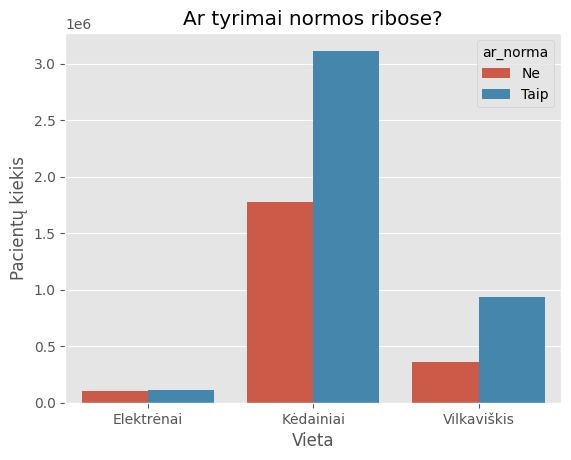

In [18]:
plotdf = bendra.groupby(['vieta', 'ar_norma'])['_id'].count().reset_index(name='kiekis')
fig, ax = plt.subplots()
sns.barplot(data=plotdf, x='vieta', y='kiekis', hue='ar_norma')
ax.set_xlabel('Vieta')
ax.set_ylabel('Pacientų kiekis')
ax.set_title('Ar tyrimai normos ribose?')

# for container in ax.containers:
#     ax.bar_label(container)
# plt.legend()
plt.show()

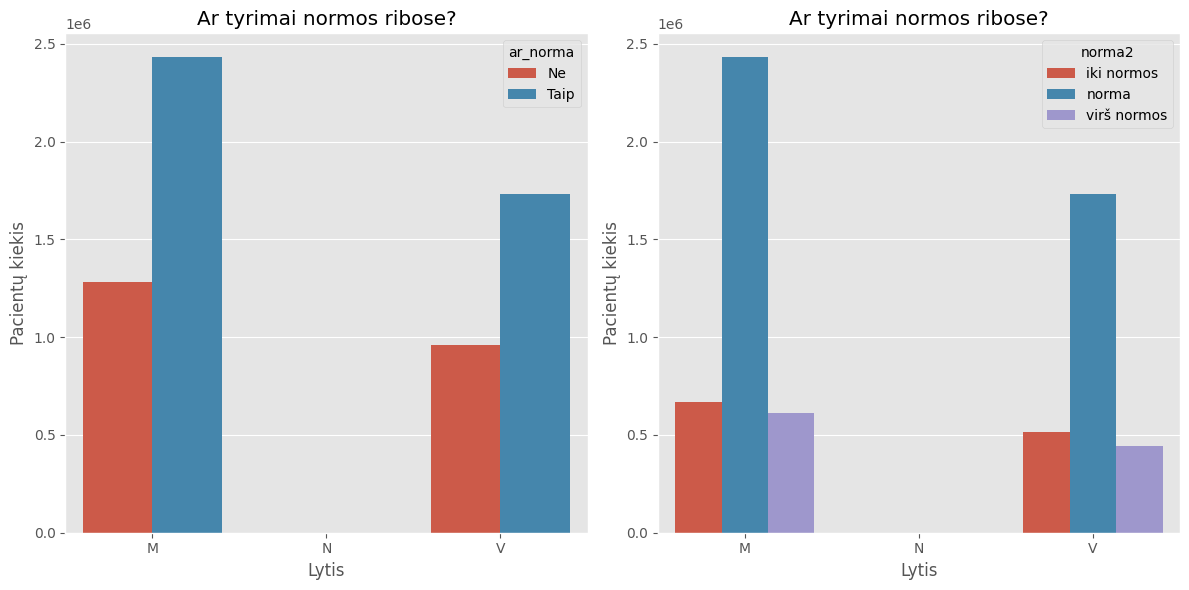

In [22]:
plotdf = bendra.groupby(['paciento_lytis', 'ar_norma'])['_id'].count().reset_index(name='kiekis')
plotdf2 = bendra.groupby(['paciento_lytis', 'norma2'])['_id'].count().reset_index(name='kiekis')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
sns.barplot(data=plotdf, x='paciento_lytis', y='kiekis', hue='ar_norma', ax=ax1)
sns.barplot(data=plotdf2, x='paciento_lytis', y='kiekis', hue='norma2', ax=ax2)
ax1.set_xlabel('Lytis')
ax1.set_ylabel('Pacientų kiekis')
ax1.set_title('Ar tyrimai normos ribose?')
ax2.set_xlabel('Lytis')
ax2.set_ylabel('Pacientų kiekis')
ax2.set_title('Ar tyrimai normos ribose?')
# for container in ax.containers:
#     ax.bar_label(container)
# plt.legend()
plt.tight_layout()
plt.show()

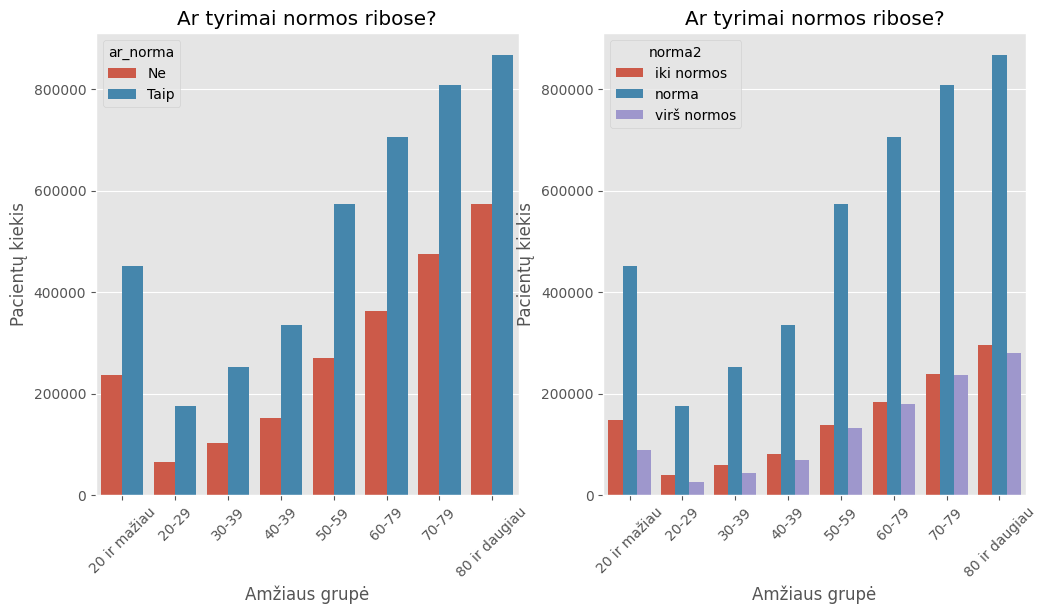

In [24]:
plotdf = bendra.groupby(['amz_grupe', 'ar_norma'])['_id'].count().reset_index(name='kiekis')
plotdf2 = bendra.groupby(['amz_grupe', 'norma2'])['_id'].count().reset_index(name='kiekis')
# fig, ax = plt.subplots()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
sns.barplot(data=plotdf, x='amz_grupe', y='kiekis', hue='ar_norma', ax=ax1)
sns.barplot(data=plotdf2, x='amz_grupe', y='kiekis', hue='norma2', ax=ax2)
ax1.set_xlabel('Amžiaus grupė')
ax1.set_ylabel('Pacientų kiekis')
ax1.set_title('Ar tyrimai normos ribose?')
ax1.tick_params(axis='x', rotation=45)
ax2.set_xlabel('Amžiaus grupė')
ax2.set_ylabel('Pacientų kiekis')
ax2.set_title('Ar tyrimai normos ribose?')
ax2.tick_params(axis='x', rotation=45)

# for container in ax.containers:
#     ax.bar_label(container)
# plt.legend()
plt.show()

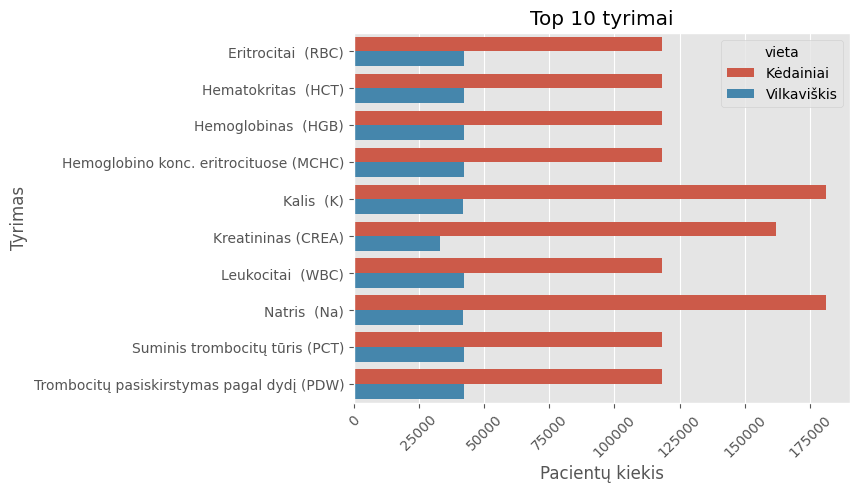

In [25]:
top_10_analite = bendra['tyrimo_analite'].value_counts().head(10).index.tolist()
# top_10_analite

plotdf = bendra[bendra['tyrimo_analite'].isin(top_10_analite)].groupby(['vieta', 'tyrimo_analite'])['_id'].count().reset_index(name='kiekis')
fig, ax = plt.subplots()
sns.barplot(data=plotdf, y='tyrimo_analite', x='kiekis', hue='vieta', orient='h')
ax.set_ylabel('Tyrimas')
ax.set_xlabel('Pacientų kiekis')
ax.set_title('Top 10 tyrimai')
ax.tick_params(axis='x', rotation=45)

# for container in ax.containers:
#     ax.bar_label(container)
# plt.legend()
plt.show()

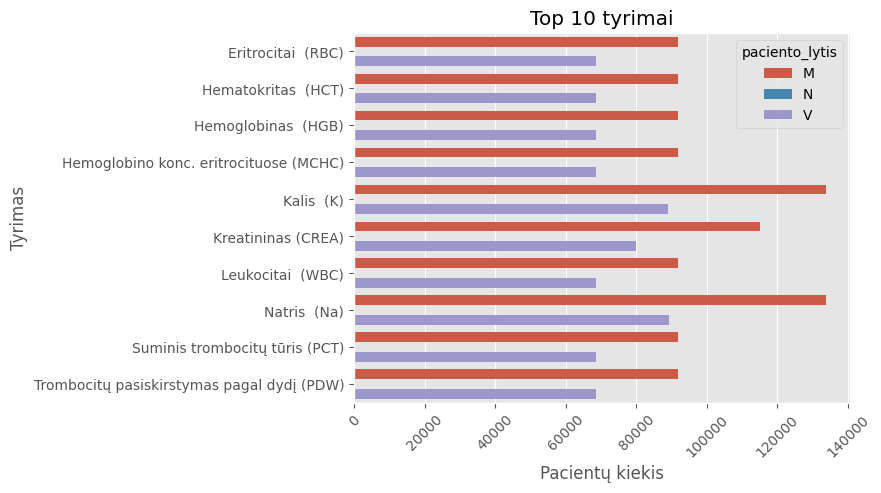

In [26]:
plotdf = bendra[bendra['tyrimo_analite'].isin(top_10_analite)].groupby(['paciento_lytis', 'tyrimo_analite'])['_id'].count().reset_index(name='kiekis')
fig, ax = plt.subplots()
sns.barplot(data=plotdf, y='tyrimo_analite', x='kiekis', hue='paciento_lytis', orient='h')
ax.set_ylabel('Tyrimas')
ax.set_xlabel('Pacientų kiekis')
ax.set_title('Top 10 tyrimai')
ax.tick_params(axis='x', rotation=45)

# for container in ax.containers:
#     ax.bar_label(container)
# plt.legend()
plt.show()

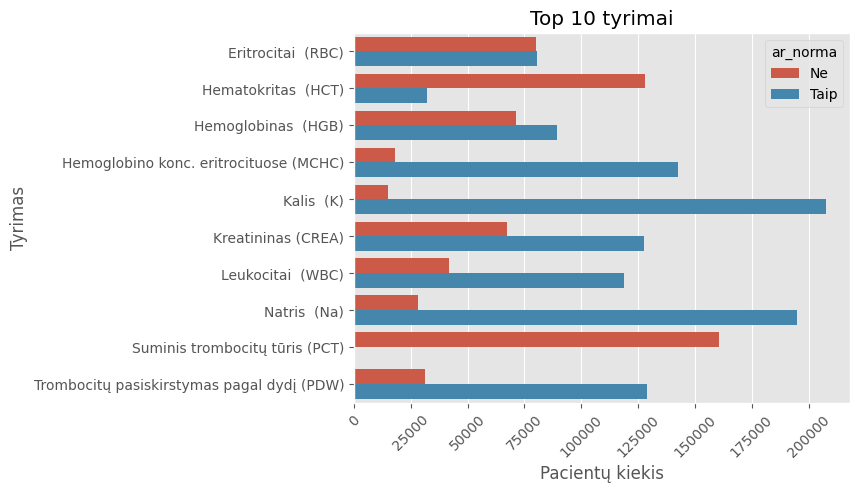

In [27]:
plotdf = bendra[bendra['tyrimo_analite'].isin(top_10_analite)].groupby(['ar_norma', 'tyrimo_analite'])['_id'].count().reset_index(name='kiekis')
fig, ax = plt.subplots()
sns.barplot(data=plotdf, y='tyrimo_analite', x='kiekis', hue='ar_norma', orient='h')
ax.set_ylabel('Tyrimas')
ax.set_xlabel('Pacientų kiekis')
ax.set_title('Top 10 tyrimai')
ax.tick_params(axis='x', rotation=45)

# for container in ax.containers:
#     ax.bar_label(container)
# plt.legend()
plt.show()
# Suminis trombocitų tūris
# Hematokritas (HCT)

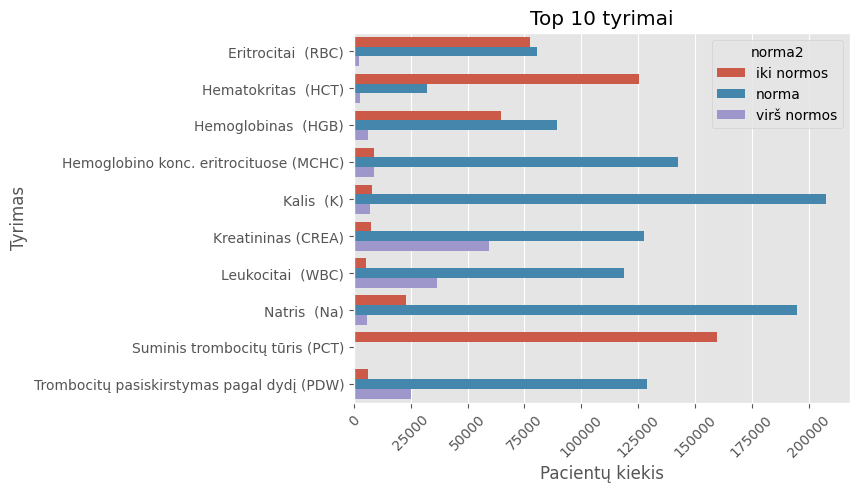

In [28]:
plotdf = bendra[bendra['tyrimo_analite'].isin(top_10_analite)].groupby(['norma2', 'tyrimo_analite'])['_id'].count().reset_index(name='kiekis')
fig, ax = plt.subplots()
sns.barplot(data=plotdf, y='tyrimo_analite', x='kiekis', hue='norma2', orient='h')
ax.set_ylabel('Tyrimas')
ax.set_xlabel('Pacientų kiekis')
ax.set_title('Top 10 tyrimai')
ax.tick_params(axis='x', rotation=45)

# for container in ax.containers:
#     ax.bar_label(container)
# plt.legend()
plt.show()
# Suminis trombocitų tūris
# Hematokritas (HCT)

In [29]:
bendra.columns

Index(['_type', '_id', '_revision', '_page.next', 'vda_prime_key',
       'istaigos_pav', 'paciento_id', 'paciento_lytis',
       'paciento_gimimo_metai', 'tyrimo_grupe', 'tyrimo_data',
       'tyrimo_meginio_tipas', 'tyrimo_analite', 'analites_loinc_kodas',
       'analites_rezultatas', 'analites_norma_nuo', 'analites_norma_iki',
       'matavimo_vienetas', 'paciento_diagnozes_tlk_10_am_kodas',
       'paciento_diagnoze', 'vieta', 'amzius', 'amz_grupe', 'ar_norma',
       'norma2'],
      dtype='object')

In [33]:
tyrimo_pav = bendra['tyrimo_analite'].unique().tolist()
print(len(tyrimo_pav))

275


In [34]:
for i in tyrimo_pav:
    print(i)

Hematokritas  (HCT)
Monocitai (MON%)
High sensitive troponin I
Vid. eritrocito tūris  (MCV)
Vidutinis  trombocito tūris (MPV)
Eritrocitai  (RBC)
Kalis  (K)
Kreatininas (CREA)
Natris  (Na)
Magnis  (Mg)
Neutrofilai abs. (NEU#)
Trombocitai (PLT)
Tirotropinis hormonas (TTH)
Limfocitai (LYM%)
Chloras  (Cl)
Eozinofilai abs. (EOS#)
Limfocitai abs. (LYM#)
Mažo tankio cholesterolis (MTL)
Alaninaminotransferazės (ALAT) aktyvumo nustatymas
Bendras baltymas (TP)
Trombocitų pasiskirstymas pagal dydį (PDW)
Neutrofilai (NEU%)
Suminis trombocitų tūris (PCT)
Hemoglobino kiekis eritrocite (MCH)
Eozinofilai (EOS%)
Monocitai abs. (MON#)
Hemoglobinas  (HGB)
Leukocitai  (WBC)
Albuminas (ALB) šlapime
Prokalcitoninas (PCT)
Gliukozė serume (GLU S)
Hemoglobino konc. eritrocituose (MCHC)
Bazofilai (BAS%)
Bilirubinas (BIL)
Laisvas tiroksinas LT4/FT4
Protrombino aktyvumas SPA
Eritrocitų pasiskirstymas pagal dydį (RDW)
Šlapalas (UREA)
C reaktyvinis baltymas (CRB)
Bazofilai abs. (BAS#)
Didelio tankio cholesterolis (

In [65]:
# pvz
count = bendra[(bendra['paciento_lytis'] == 'V') & (bendra['paciento_gimimo_metai'].dt.year == 1980)]['norma2'].value_counts()
count

norma2
norma          12855
iki normos      3213
virš normos     2874
Name: count, dtype: int64

count.sum()

In [ ]:
# Parašykite skriptą, kuris iš
# vartotojo pateiktų duomenų įvertintų, palygintų šio vartotojo sveikatos būklę su atitinkamos
# grupės žmonių sveikatos būkle.

np.int64(2692789)

In [70]:


def duomenu_vertinimas(lytis, gim_metai, analite_tyrimas, analite_rezultatas):
    # Vetinsime pacientus kurie gimė +-2 metai nuo pateiktų metų
    nuo_gimimo_metai = gim_metai -2
    iki_gimimo_metai = gim_metai +2
    ats = bendra[(bendra['paciento_lytis'] == lytis)&
                (bendra['paciento_gimimo_metai'].dt.year >= nuo_gimimo_metai)&
                (bendra['paciento_gimimo_metai'].dt.year <= iki_gimimo_metai)&
                (bendra['tyrimo_analite'] == analite_tyrimas)]['norma2'].value_counts()
    


    # Randame norimo tyrimo rezultatų ribas
    iki_norma = bendra[(bendra['paciento_lytis'] == lytis)&
                    (bendra['tyrimo_analite'] == analite_tyrimas)]['analites_norma_iki'].values[0]

    nuo_norma = bendra[(bendra['paciento_lytis'] == lytis)&
                    (bendra['tyrimo_analite'] == analite_tyrimas)]['analites_norma_nuo'].values[0]
    
    vienetas  = bendra[bendra['tyrimo_analite'] == analite_tyrimas]['matavimo_vienetas'].values[0]

    # ar pateikto tyrimo rezultatas norma?
    norma = 'norma'
    if analite_rezultatas < nuo_norma:
        norma = 'iki normos'
    elif analite_rezultatas > iki_norma:
        norma = 'virš normos'


    
    if ats.sum() < 10:
        print('Per mažai įvertinti rezultatą')
    else:
        print(f'Tyrimas - {analite_tyrimas}')
        print(f'Tyrimo rezultatų ribos: {nuo_norma} - {iki_norma} {vienetas}')
        print(f'Jūsų tyrimo rezultatas {analite_rezultatas} {vienetas} yra {norma}')
        print()
        print('Kitų pacientų rezultatų palyginimas')
        print(f'Iki normos: {ats['iki normos'] / ats.sum() *100:.2f} %')
        print(f'Norma: {ats['norma'] / ats.sum() *100:.2f} %')
        print(f'Virš normos: {ats['virš normos'] / ats.sum() *100:.2f} %')





In [82]:
lyt = 'V'  # V - vyrai, M - moterys
gimimo_metai = 1960

tyrimas = 'Limfocitai (LYM%)'
tyrimo_rezultatas = 30

duomenu_vertinimas(lyt,gimimo_metai, tyrimas, tyrimo_rezultatas)

Tyrimas - Limfocitai (LYM%)
Tyrimo rezultatų ribos: 17.0 - 57.0 %
Jūsų tyrimo rezultatas 30 % yra norma

Kitų pacientų rezultatų palyginimas
Iki normos: 47.99 %
Norma: 46.27 %
Virš normos: 5.73 %
